In [1]:
import pandas as pd
from scipy.io import arff

# 1.了解数据集

### 1.1观察官方文档

In [2]:
# 读取ARFF文件
file_path = '../DataSet/ObesityDataSet_raw_and_data_sinthetic.arff'
data, meta = arff.loadarff(file_path)

# 将数据转换为pandas DataFrame
df = pd.DataFrame(data)

# 数据集的形状
print("数据集的形状: ")
print(df.shape)

# 显示数据集的前几行
print("数据集的前五行：")
print(df.head())

# 显示数据集的基本信息
print("\n数据集的信息：")
print(df.info())

# 显示数据集的统计描述
print("\n数据集的统计描述：")
print(df.describe().T)

数据集的形状: 
(2111, 17)
数据集的前五行：
      Gender   Age  Height  Weight family_history_with_overweight   FAVC  \
0  b'Female'  21.0    1.62    64.0                         b'yes'  b'no'   
1  b'Female'  21.0    1.52    56.0                         b'yes'  b'no'   
2    b'Male'  23.0    1.80    77.0                         b'yes'  b'no'   
3    b'Male'  27.0    1.80    87.0                          b'no'  b'no'   
4    b'Male'  22.0    1.78    89.8                          b'no'  b'no'   

   FCVC  NCP          CAEC   SMOKE  CH2O     SCC  FAF  TUE           CALC  \
0   2.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  0.0  1.0          b'no'   
1   3.0  3.0  b'Sometimes'  b'yes'   3.0  b'yes'  3.0  0.0   b'Sometimes'   
2   2.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  2.0  1.0  b'Frequently'   
3   3.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  2.0  0.0  b'Frequently'   
4   2.0  1.0  b'Sometimes'   b'no'   2.0   b'no'  0.0  0.0   b'Sometimes'   

                     MTRANS              NObeyesdad

### 1.2验证官方文档

In [3]:
# 定义计算各个指标的函数
def calculate_statistics(column):
    stats = {}
    stats['count'] = column.count()
    stats['mean'] = column.mean()
    stats['std'] = column.std()
    stats['min'] = column.min()
    stats['25%'] = column.quantile(0.25)
    stats['50%'] = column.median()
    stats['75%'] = column.quantile(0.75)
    stats['max'] = column.max()
    return stats

# 计算所有数值列的统计信息
numeric_columns = df.select_dtypes(include=['float64']).columns
manual_stats = {}

for col in numeric_columns:
    manual_stats[col] = calculate_statistics(df[col])

# 转换为DataFrame以便查看
manual_stats_df = pd.DataFrame(manual_stats)

print("手动计算的统计信息：")
print(manual_stats_df.T)

手动计算的统计信息：
         count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00  


# 2.系统地方案

### 2.1 数据观察和探索性数据分析（EDA）：
对肥胖数据集的探索性数据分析，包括目标变量的分布、数值变量间的相关性以及类别变量对肥胖程度的影响。

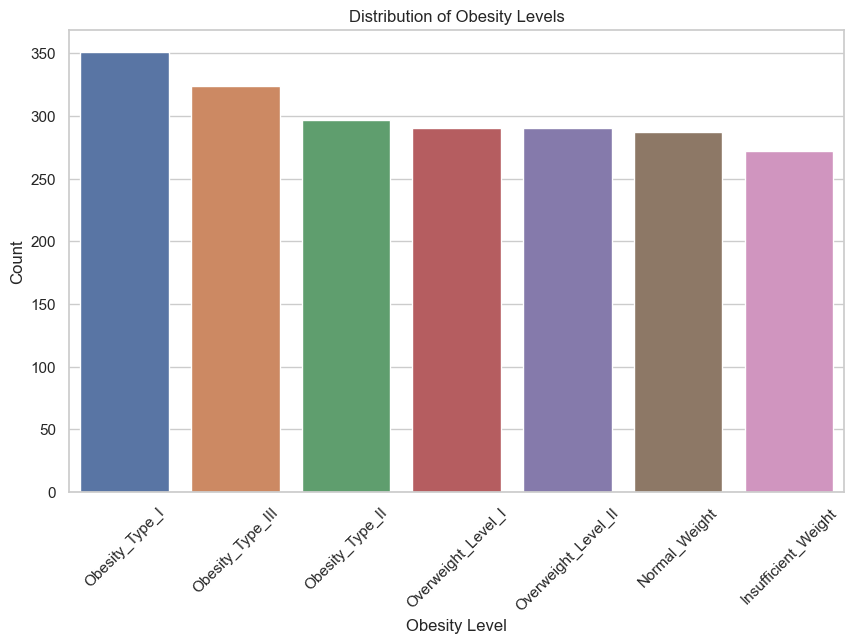

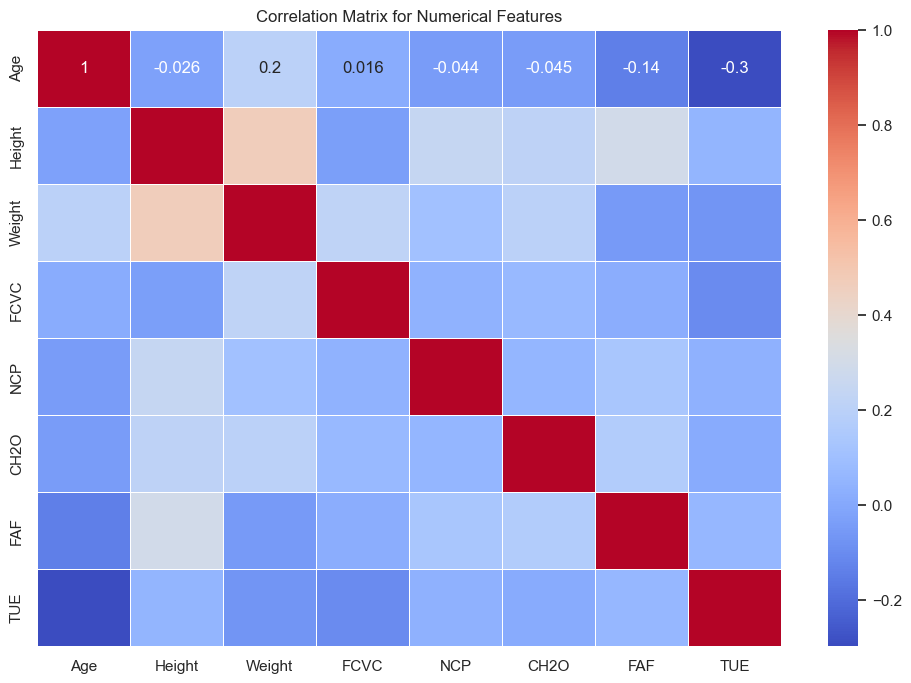

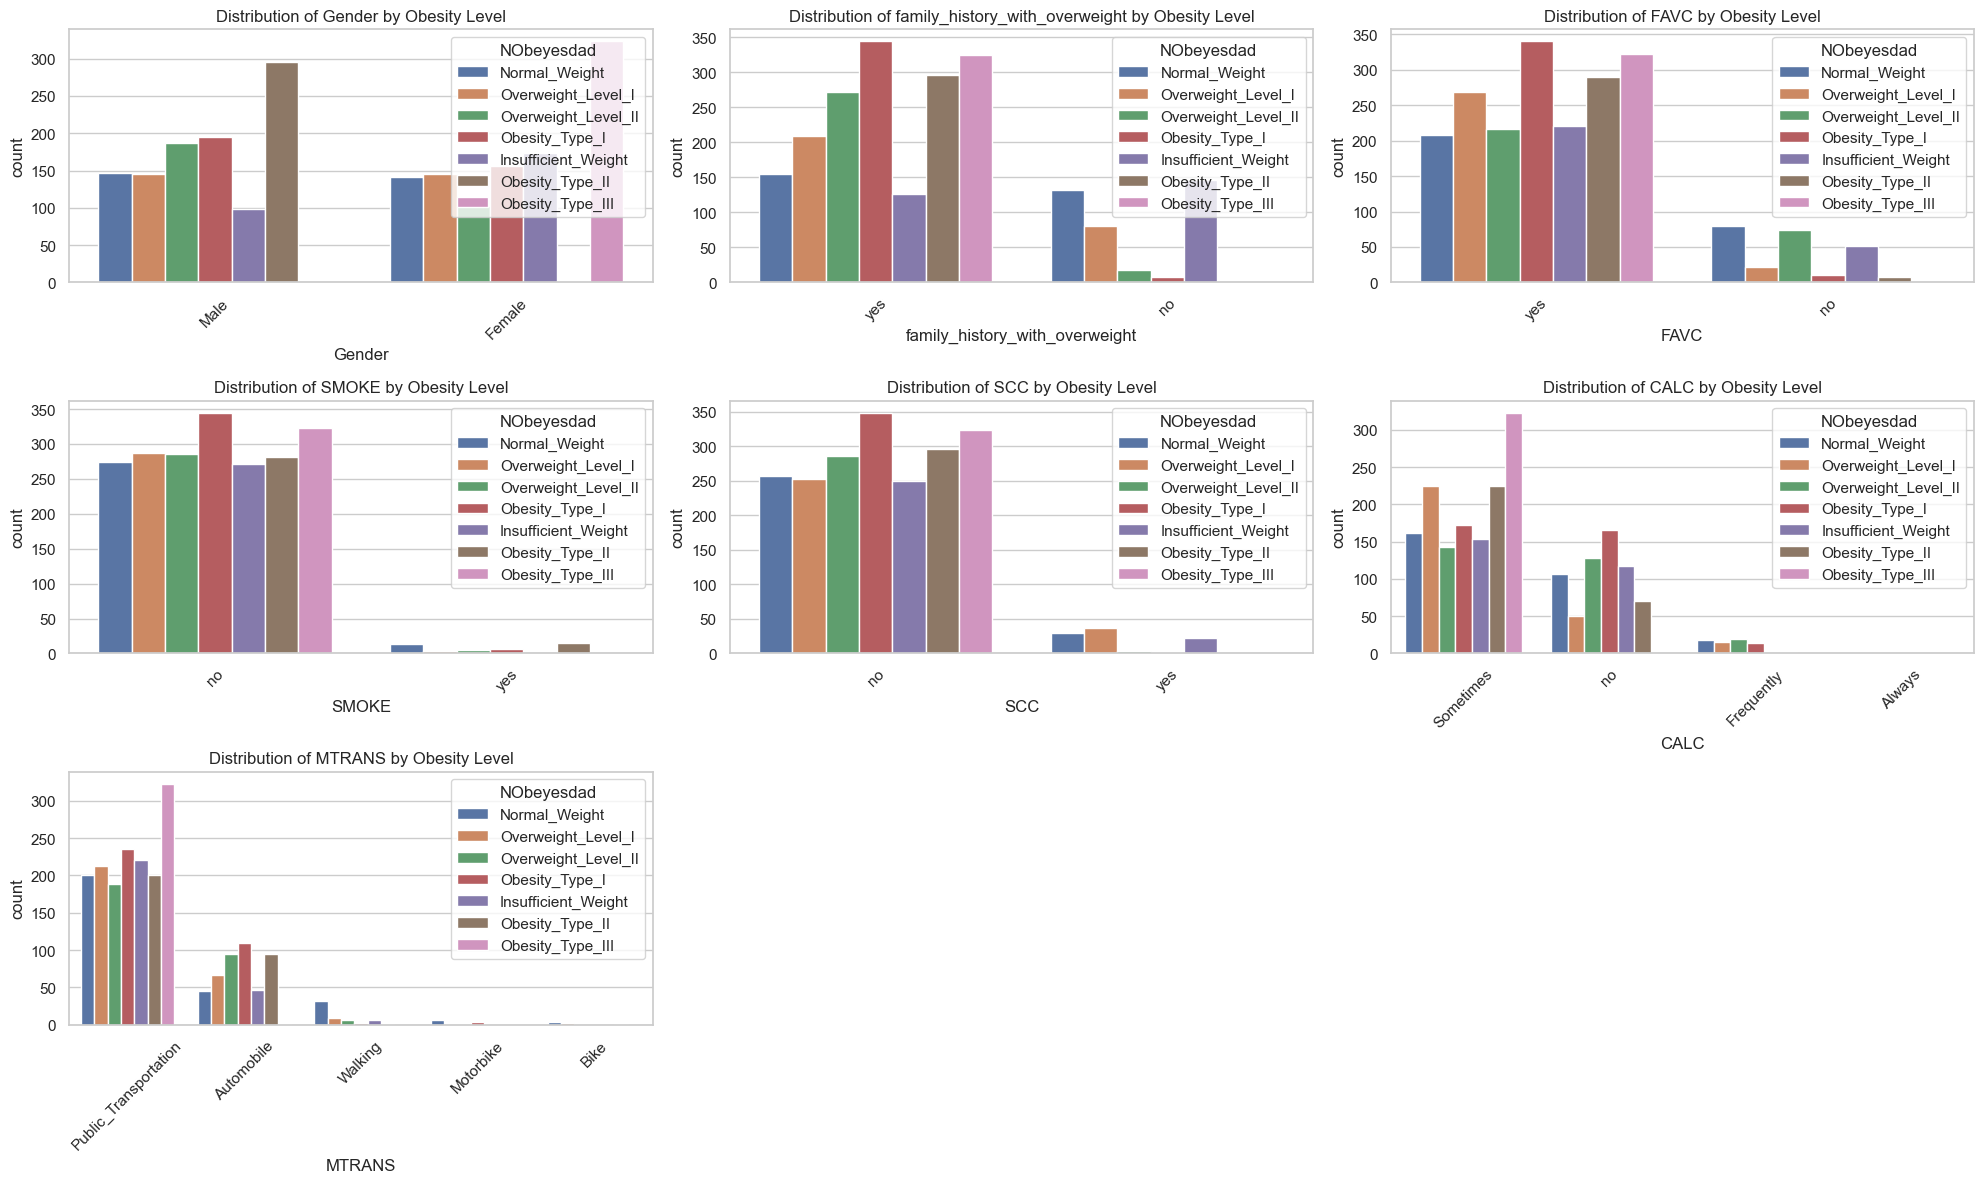

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 将所有分类变量（文本变量）从字节编码转换为字符串。因为 .arff 文件中的字符串数据通常是字节格式的，所以需要解码成 UTF-8 格式以便正确读取和操作。
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.decode('utf-8')

# 设置 seaborn 的绘图样式为“whitegrid”，使图表背景为白色网格，方便数据可视化和阅读。
sns.set(style="whitegrid")

# Distribution analysis for the target variable
# 使用 countplot 绘制目标变量 NObeyesdad（肥胖程度）的分布图。
# order 参数按目标变量的类别频率排序，以使图表更具可读性。
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=45)
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.show()

# Correlation analysis with a heatmap for numerical variables
numerical_features = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_features].corr()

# 数值类别的相关性分析
plt.figure(figsize=(12, 8))
# 提取数据框中的数值变量列（类型为 float64），计算这些变量的相关矩阵。绘制相关矩阵的热力图，以便直观显示数值变量之间的相关性。
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Category variable analysis using count plots
# 种类类型的相关分析
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='NObeyesdad', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col} by Obesity Level")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"""
图标结论:
1.图1: 数据集数量分布相对均匀，每个类别都在300附近 --> 对模型相对友好
2.图2:非线性关系：由于数值变量间相关性不高，可以考虑使用树模型或神经网络等非线性模型来捕捉潜在模式。
在相关性分析中，数值变量之间的相关性较低（如 Weight 与 Age 的相关性仅为 0.2，Height 与 CH2O 的相关性约为 0.2），说明它们之间的线性关系不强。通常情况下，线性模型（如逻辑回归）难以捕捉到这些弱相关变量的复杂关系。
树模型（如随机森林、XGBoost）和神经网络擅长处理非线性关系，能够自动捕捉变量之间的复杂相互作用。它们可以处理多个特征之间的交互效应，适合于具有弱线性关系的变量集合。
3.重要变量：肥胖家族史、高热量食物摄入和交通方式
肥胖家族史（family_history_with_overweight）：在类别分布图中，具有肥胖家族史的人显著多出现在肥胖类别，尤其是“Obesity_Type_I”、“Obesity_Type_II”和“Obesity_Type_III”。这表明肥胖家族史对肥胖有直接影响。
高热量食物摄入（FAVC）：经常摄入高热量食物的人在肥胖级别中的分布较高，特别是在“Obesity_Type_III”。这种分布模式表明高热量食物摄入与肥胖类别之间有一定的关系。
交通方式（MTRANS）：在交通方式与肥胖类别的关系图中，依赖汽车的人多出现在肥胖类别，而步行或公共交通的使用者在正常体重和不足体重类别中的比例更高。这意味着交通方式与日常活动量的关系直接影响肥胖风险。
这些变量在与肥胖类别的关系上展现出明显的差异，因此可以认为它们是重要特征，值得保留用于模型训练。
4.数值型变量：Weight 和 Height 结合 BMI
在相关性矩阵中，Weight 和 Height 之间具有0.46的相关性，说明它们存在一定程度的线性关系。由于 BMI（Body Mass Index）是通过体重和身高计算得到的，BMI是肥胖程度的直接指标，因此使用体重和身高计算BMI作为派生特征能更好地反映肥胖程度。
进一步来看，BMI = Weight / (Height^2)。结合 BMI 作为新的特征，可以帮助捕捉体重和身高对肥胖程度的综合影响。
因此，将体重和身高结合为BMI，能更准确地衡量肥胖程度，适合作为派生特征进行分析。
5.类别变量处理：考虑对类别变量进行One-Hot编码，以便在模型中充分利用这些类别信息。
类别变量处理：One-Hot 编码
在观察类别变量与肥胖等级的分布图时，类别变量（如 Gender、family_history_with_overweight、FAVC、CALC 等）对于目标变量存在显著的区别。为了让模型能够充分利用这些类别信息，我们可以通过 One-Hot 编码将其转换为数值形式，以便于模型识别。
One-Hot 编码可以避免类别之间的顺序性假设（如 Label Encoding），并保留类别之间的独立性。对于涉及多个类别的变量（如 MTRANS），One-Hot 编码能让模型更好地理解其对肥胖类别的贡献。
因此，考虑到类别变量的重要性和多样性，One-Hot 编码能确保模型不会对类别的自然排序产生误解，从而更准确地捕捉不同类别变量对肥胖的影响。
"""

异常值分析：IQR + Z-Score + Modified Z-Score：是一种改进的Z-Score，使用中位数和中位数绝对偏差（MAD）来检测异常值。

箱线图（IQR法）：基于四分位数（IQR）的异常值检测：

适用于大多数变量，如Age和NCP中检测到较多的异常值。<br>
通常适用于非正态分布的数据，但对极端值较为敏感。
IQR法：将异常值替换为上下边界值。

Z-Score：基于标准化的异常值检测。
主要在Age和Weight中检测到少量异常值。
适合正态分布的数据，但对于偏态数据可能不够有效。
Z-Score法：将异常值替换为平均值。

Modified Z-Score法：

在Age和NCP中检测到较多的异常值。
更适合偏态分布的数据，因为使用中位数和MAD进行计算，对极端值更加鲁棒。
Modified Z-Score法：将异常值替换为中位数。

### 2.2 数据预处理：数据编码 + 数据预处理 + 数据分割

### 缺失值处理：数值 -> 平均数 ； 种类 -> 众数

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.io import arff
from sklearn.impute import SimpleImputer

file_path = '../DataSet/ObesityDataSet_raw_and_data_sinthetic.arff'
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.decode('utf-8')

In [6]:
# Handle missing values
# For numerical columns, replace missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['float64']))

# For categorical columns, replace missing values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object', 'category']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object', 'category']))

# Display the result to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### 异常值处理：将异常值替换为上限或下限值

In [7]:
# Define function to cap outliers based on IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Apply outlier capping for numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    cap_outliers(df, col)

# Display information to verify outlier handling
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.910277,1.701676,86.584811,2.419043,2.835525,2.008011,1.010298,0.657866
std,5.277434,0.093299,26.187117,0.533927,0.400898,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,2.146845,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,35.079212,1.976160,170.366691,3.000000,3.511893,3.000000,3.000000,2.000000


In [8]:
### 数据类型的转换：

In [9]:
# Calculate BMI and drop Weight and Height columns
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df = df.drop(['Weight', 'Height'], axis=1)

In [10]:
### 热编码

In [11]:
# Encode the target variable
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                                         'SMOKE', 'SCC', 'CALC', 'MTRANS'], drop_first=False)

# Display information to verify transformations and encoding
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   FCVC                                2111 non-null   float64
 2   NCP                                 2111 non-null   float64
 3   CH2O                                2111 non-null   float64
 4   FAF                                 2111 non-null   float64
 5   TUE                                 2111 non-null   float64
 6   NObeyesdad                          2111 non-null   int32  
 7   BMI                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.000000,2.0,0.0,1.0,1,24.386526,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,3.0,3.000000,3.0,3.0,0.0,1,24.238227,True,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,2.0,3.000000,2.0,2.0,1.0,1,23.765432,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.0,3.0,3.000000,2.0,2.0,0.0,5,26.851852,False,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,2.0,2.146845,2.0,0.0,0.0,6,28.342381,False,True,...,False,False,False,True,False,False,False,False,True,False


In [12]:
# Prepare features and target for splitting
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

In [13]:
### 不同类型的数据集

In [14]:
# 1. Standard Version (for both Neural Network and Random Forest)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 2. Feature Scaling Version (for Neural Network)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# 3.PCA
from sklearn.decomposition import PCA
# Define number of components for PCA - this can be adjusted based on desired variance
n_components = 10  # for example, reduce to 10 principal components

# Apply PCA on the scaled data (from Version 2)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
# 4. Binning Version (for Random Forest)
binned_df = df_encoded.copy()
binned_df['Age_bin'] = pd.cut(binned_df['Age'], bins=10, labels=False)  # 10 bins for Age
binned_df['BMI_bin'] = pd.cut(binned_df['BMI'], bins=10, labels=False)  # 10 bins for BMI
binned_df = binned_df.drop(['Age', 'BMI'], axis=1)  # Drop original Age and BMI after binning

X_binned = binned_df.drop('NObeyesdad', axis=1)
y_binned = binned_df['NObeyesdad']
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X_binned, y_binned, test_size=0.2, random_state=42)

In [18]:
# 5. Feature Interaction Version (for both Neural Network and Random Forest)
interaction_df = X.copy()
interaction_df['Age_BMI'] = df['Age'] * df['BMI']  # Example interaction feature between Age and BMI
interaction_df['FCVC_NCP'] = df['FCVC'] * df['NCP']  # Example interaction feature between FCVC and NCP

X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(interaction_df, y, test_size=0.2, random_state=42)

In [19]:
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (X_train_pca, X_test_pca, y_train_pca, y_test_pca),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

In [20]:
# Output shapes to verify each version, including the new PCA version
(X_train_std.shape, X_test_std.shape, y_train_std.shape, y_test_std.shape,
 X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape,
 X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape,
 X_train_binned.shape, X_test_binned.shape, y_train_binned.shape, y_test_binned.shape,
 X_train_inter.shape, X_test_inter.shape, y_train_inter.shape, y_test_inter.shape)

((1688, 30),
 (423, 30),
 (1688,),
 (423,),
 (1688, 30),
 (423, 30),
 (1688,),
 (423,),
 (1688, 10),
 (423, 10),
 (1688,),
 (423,),
 (1688, 30),
 (423, 30),
 (1688,),
 (423,),
 (1688, 32),
 (423, 32),
 (1688,),
 (423,))

In [21]:
# 模型的训练

In [56]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Create ANN model function with dynamic input shape
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes, version):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.int32)

    if model_type == "RF":
        params = {
            'n_estimators': [50],
            'max_depth': [10],
            'min_samples_split': [2]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(
            rf_model, param_distributions=params, n_iter=1, 
            cv=kf, scoring='accuracy', n_jobs=-1
        )
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        
        # Save model as PKL
        joblib.dump(best_rf_model, f'RF_best_model_{version}.pkl')

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        input_shape = X_train.shape[1]
        best_score = 0
        best_params = None

        param_grid = {
            'neurons': [16],
            'layers': [2],
            'epochs': [50],
            'batch_size': [20]
        }

        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

                            model = create_ann_model(neurons, layers, input_shape, num_classes)
                            model.fit(
                                X_train_fold, y_train_fold, 
                                epochs=epochs, batch_size=batch_size, verbose=0
                            )
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)

                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {
                                'neurons': neurons, 
                                'layers': layers, 
                                'epochs': epochs, 
                                'batch_size': batch_size
                            }

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], input_shape, num_classes)
        best_ann_model.fit(X_train, y_train, 
                           epochs=best_params['epochs'], 
                           batch_size=best_params['batch_size'], 
                           verbose=0)
        
        # Save model as H5
        best_ann_model.save(f'ANN_best_model_{version}.h5')

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets as numpy arrays
datasets = {
    'standard': (X_train_std.values.astype(np.float32), X_test_std.values.astype(np.float32), y_train_std.values, y_test_std.values),
    'scaled': (X_train_scaled.astype(np.float32), X_test_scaled.astype(np.float32), y_train_scaled, y_test_scaled),
    'pca': (X_train_pca.astype(np.float32), X_test_pca.astype(np.float32), y_train_pca, y_test_pca),
    'binned': (X_train_binned.values.astype(np.float32), X_test_binned.values.astype(np.float32), y_train_binned.values, y_test_binned.values),
    'interaction': (X_train_inter.values.astype(np.float32), X_test_inter.values.astype(np.float32), y_train_inter.values, y_test_inter.values)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    if version in ['standard', 'binned']:
        best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes, version)
        rf_accuracy = best_rf.score(X_test, y_test)
        result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes, version)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params}
    
    results[version] = result

# Save results to JSON (without model objects)
serializable_results = {}
for version, result in results.items():
    serializable_results[version] = {}
    for model_type, metrics in result.items():
        if isinstance(metrics, dict):
            serializable_results[version][model_type] = {
                'accuracy': metrics['accuracy'],
                'params': metrics['params']
            }

with open('model_results.json', 'w') as f:
    json.dump(serializable_results, f)

# Display results
serializable_results


{'standard': {'RF': {'accuracy': 0.966903073286052,
   'params': {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}}},
 'scaled': {'ANN': {'accuracy': 0.9219858050346375,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}},
 'pca': {'ANN': {'accuracy': 0.7470449209213257,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}},
 'binned': {'RF': {'accuracy': 0.8865248226950354,
   'params': {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}}},
 'interaction': {'ANN': {'accuracy': 0.8747044801712036,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}}}


Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9673
Recall: 0.9669
F1 Score: 0.9669
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


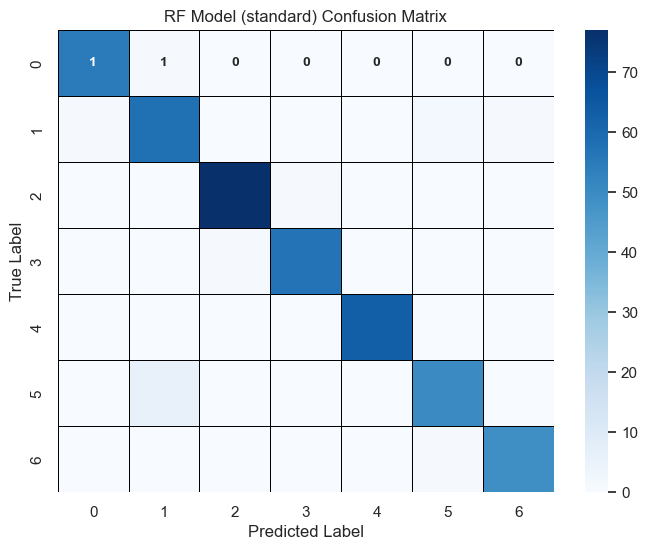

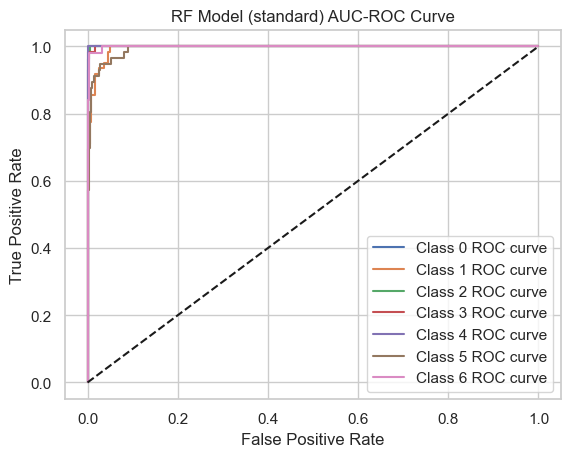


Evaluating Dataset: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883622170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883622170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.exper

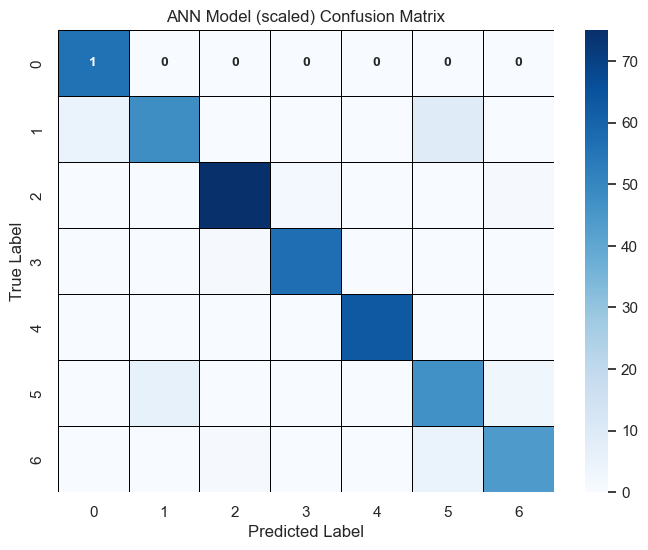

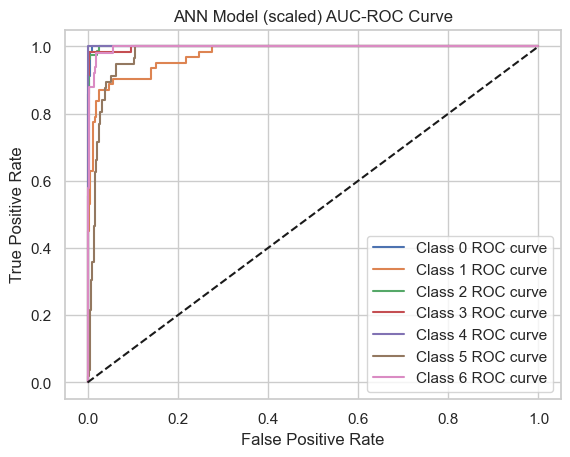


Evaluating Dataset: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A6CDB40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A6CDB40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experime

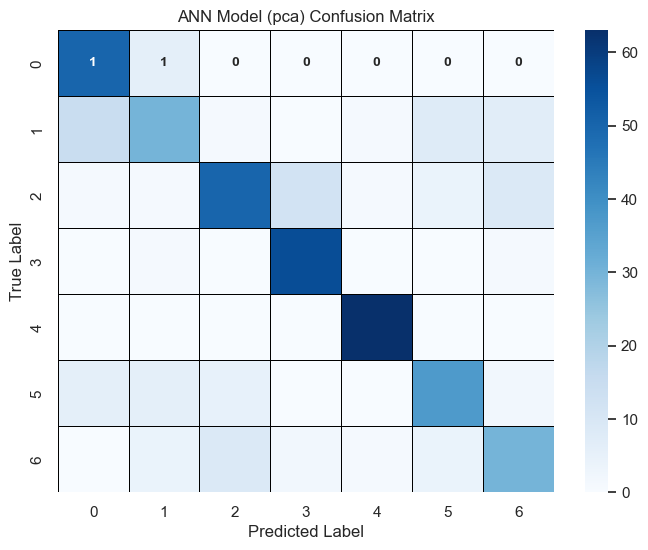

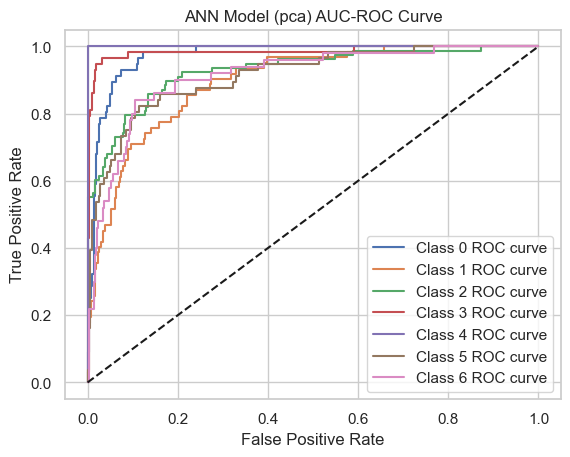


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (binned) Evaluation Results:
Accuracy: 0.8865
Precision: 0.8855
Recall: 0.8865
F1 Score: 0.8855
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


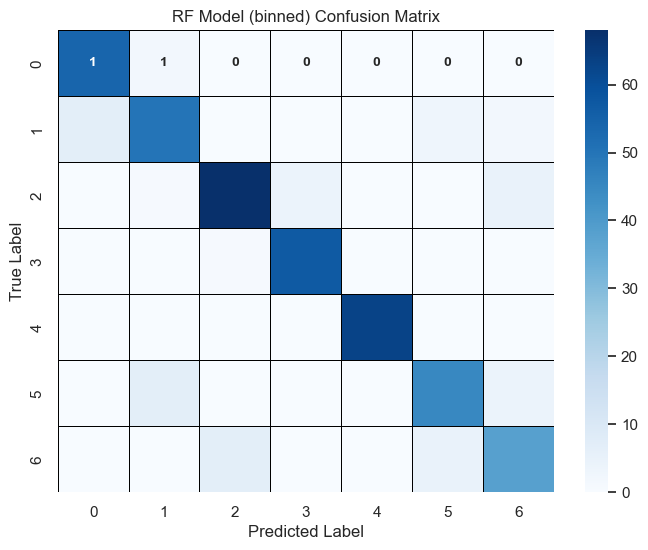

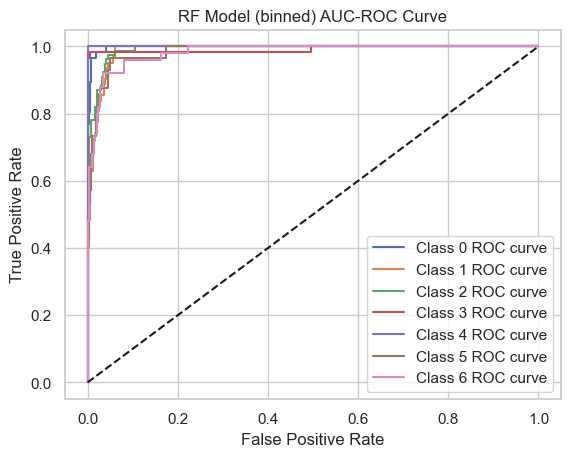


Evaluating Dataset: interaction
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020894417250>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020894417250>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.

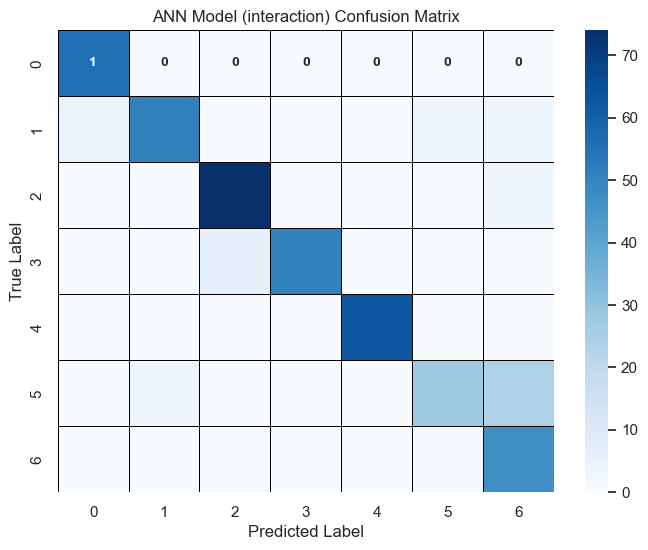

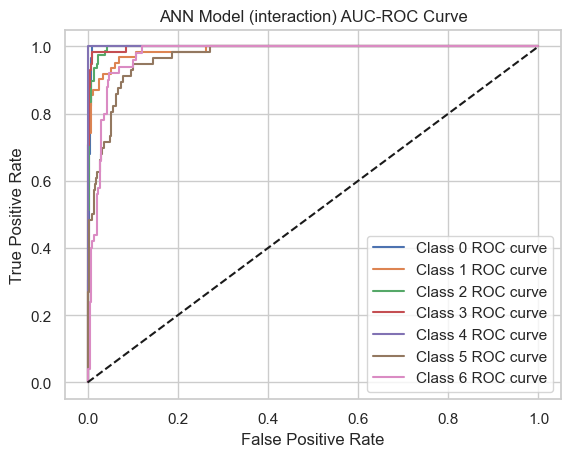

In [67]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    
    # Annotate only non-zero values
    mask = conf_matrix > 0
    sns.heatmap(conf_matrix, annot=mask, fmt='d', cmap='Blues', cbar=True, 
                annot_kws={"weight": "bold", "fontsize": 10}, linewidths=0.5, linecolor='black')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Suppress AutoGraph warnings globally
@tf.autograph.experimental.do_not_convert
def model_predict(model, data):
    return model.predict(data)

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")
    
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix as a heatmap
    plot_confusion_matrix(conf_matrix, title=f'{model_name} Confusion Matrix')

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')

        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = model_predict(best_ann_model, X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)


In [ ]:
# 模型性能的评估